<a href="https://colab.research.google.com/github/rgolino/Business_Analytics_Intelligence/blob/main/An%C3%A1lise_Performace_e_Risco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de Dados e seus KPI e KRI

##O presente projeto tem como finalidade a análise de uma base de dados, exploração e criação dos KPI (Indicadores de Performance) e KRI (Indicadores de Risco).

### Após as análise será possível verificar e extrair insigths propondo melhorias e novos projetos.

#### Para esse projeto, teremos como primeiro passo as instalações das seguintes bibliotecas.



*   Pandas;
*   Nunpy;
*   Matplotlib;
*   Seaborn.





In [3]:
# Instalando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Configurações gerais

plt.style.use('seaborn-darkgrid')

<ipython-input-4-187873e2892a>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [5]:
# Carregar os dados
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Gerador de Base de Dados/modelo_dados.csv')

In [6]:
# Função auxiliar para calcular o VaR (Value at Risk)

def calculate_var(data, confidence_level=0.95):
    return np.percentile(data, (1-confidence_level)*100)

### Análise de Performance

In [7]:
# 1. Crescimento da Receita
df['Revenue Growth'] = df['Revenue'].pct_change()

In [8]:
# 2. Margem de Lucro
df['Profit Margin'] = df['Profit'] / df['Revenue']

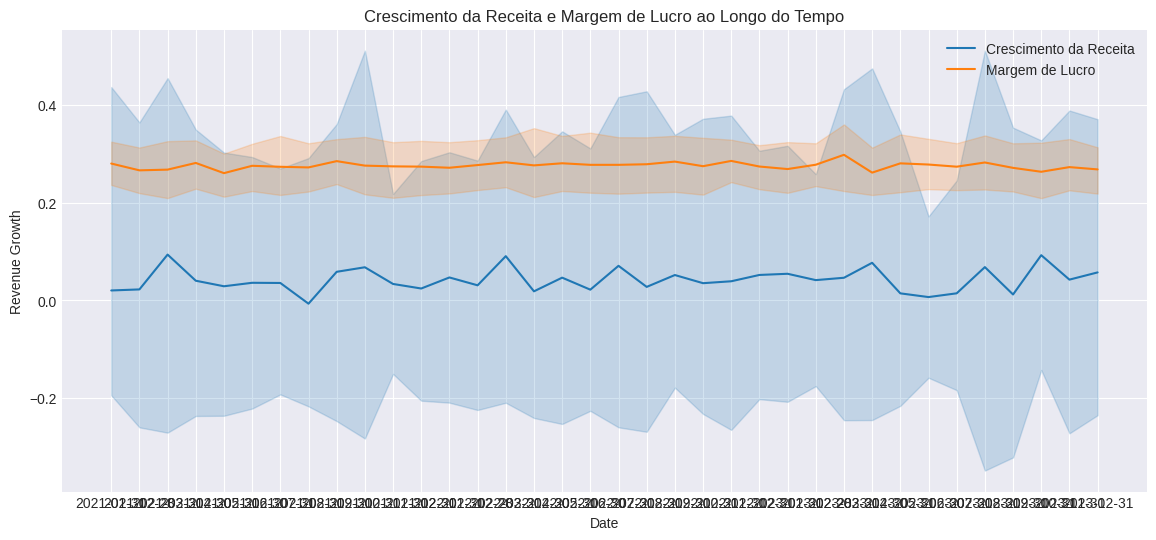

In [9]:
# 3. Gráficos de Performance
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='Date', y='Revenue Growth', label='Crescimento da Receita')
sns.lineplot(data=df, x='Date', y='Profit Margin', label='Margem de Lucro')
plt.title('Crescimento da Receita e Margem de Lucro ao Longo do Tempo')
plt.legend()
plt.show()

### Análise de Segmentos de Mercado

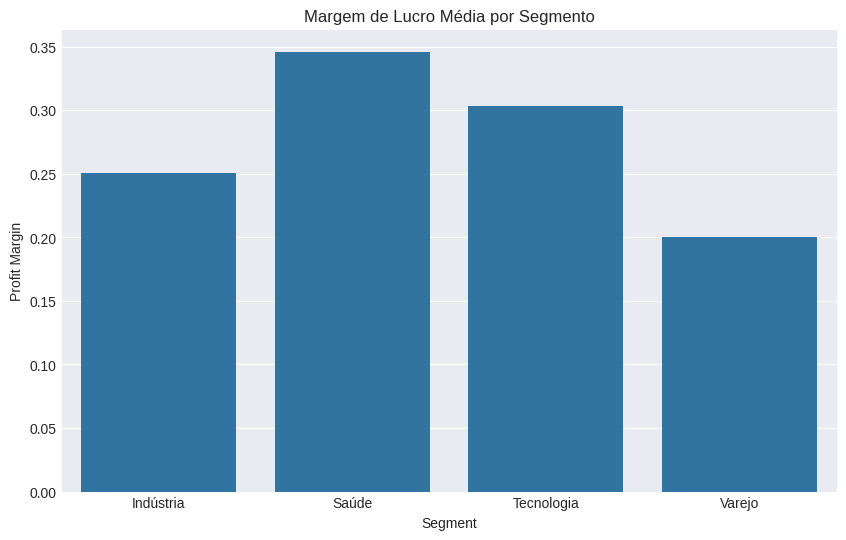

In [10]:
# 4. Comparação de Performance entre Segmentos
segment_performance = df.groupby('Segment')['Profit Margin'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=segment_performance, x='Segment', y='Profit Margin')
plt.title('Margem de Lucro Média por Segmento')
plt.show()

### Análise de Risco

In [11]:
# 5. Volatilidade da Receita
df['Revenue Volatility'] = df['Revenue Growth'].rolling(window=12).std()

In [13]:
# 6. Value at Risk (Var) - Exposição a perdas
var = calculate_var(df['Revenue Growth'].dropna(), confidence_level=0.95)

In [14]:
# 7. Stress Testing - Simulação de Cenários Adversos
df['Stress Test'] = df['Revenue Growth'] * (1 - df['Revenue Volatility'])

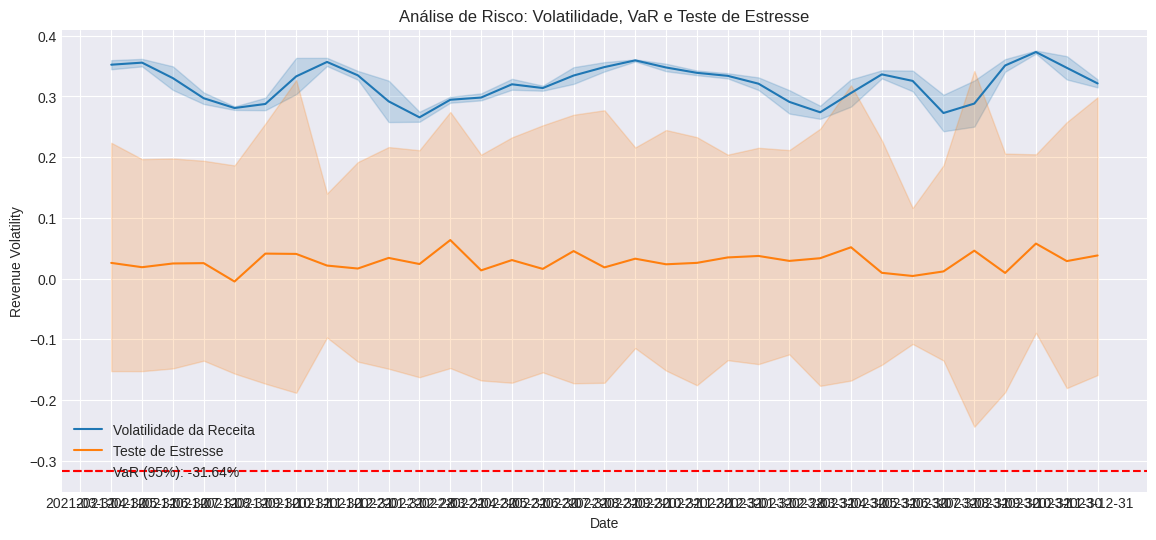

In [15]:
# Gráficos de Risco
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='Date', y='Revenue Volatility', label='Volatilidade da Receita')
sns.lineplot(data=df, x='Date', y='Stress Test', label='Teste de Estresse')
plt.axhline(var, color='red', linestyle='--', label=f'VaR (95%): {var:.2%}')
plt.title('Análise de Risco: Volatilidade, VaR e Teste de Estresse')
plt.legend()
plt.show()

###Insigths

In [16]:
# 8. Identificando os Pontos Fortes e Fracos
mean_growth = df['Revenue Growth'].mean()
mean_profit_margin = df['Profit Margin'].mean()

high_performance = df[df['Revenue Growth'] > mean_growth]
low_performance = df[df['Revenue Growth'] < mean_growth]
strong_segments = segment_performance[segment_performance['Profit Margin'] > mean_profit_margin]
weak_segments = segment_performance[segment_performance['Profit Margin'] < mean_profit_margin]

print("Pontos Fortes:")
print(f"Períodos com crescimento da receita acima da média ({mean_growth:.2%}):\n", high_performance[['Date', 'Revenue Growth']])

print("\nPontos Fracos:")
print(f"Períodos com crescimento da receita abaixo da média ({mean_growth:.2%}):\n", low_performance[['Date', 'Revenue Growth']])

print("\nSegmentos Fortes:")
print(f"Segmentos com margem de lucro acima da média ({mean_profit_margin:.2%}):\n", strong_segments)

print("\nSegmentos Fracos:")
print(f"Segmentos com margem de lucro abaixo da média ({mean_profit_margin:.2%}):\n", weak_segments)


Pontos Fortes:
Períodos com crescimento da receita acima da média (4.21%):
            Date  Revenue Growth
2    2021-01-31        0.435937
4    2021-02-28        0.057114
6    2021-02-28        0.551521
8    2021-03-31        0.194358
10   2021-03-31        0.670981
..          ...             ...
134  2023-10-31        0.341656
136  2023-11-30        0.110530
138  2023-11-30        0.602442
140  2023-12-31        0.158116
142  2023-12-31        0.539858

[67 rows x 2 columns]

Pontos Fracos:
Períodos com crescimento da receita abaixo da média (4.21%):
            Date  Revenue Growth
1    2021-01-31       -0.194107
3    2021-01-31       -0.181193
5    2021-02-28       -0.199764
7    2021-02-28       -0.319446
9    2021-03-31       -0.195953
..          ...             ...
135  2023-10-31       -0.169647
137  2023-11-30       -0.288298
139  2023-11-30       -0.255250
141  2023-12-31       -0.138368
143  2023-12-31       -0.331087

[76 rows x 2 columns]

Segmentos Fortes:
Segmentos com

In [17]:
# 9. Avaliação da Viabilidade
if mean_growth > 0 and mean_profit_margin > 0:
    print("\nA empresa demonstra viabilidade, com crescimento e margem de lucro positivos.")
else:
    print("\nHá riscos significativos, sugerindo a necessidade de ajustes estratégicos.")



A empresa demonstra viabilidade, com crescimento e margem de lucro positivos.


In [18]:
# 10. Riscos Identificados
print(f"\nO Value at Risk (VaR) com 95% de confiança indica uma possível perda máxima de {var:.2%} em um período desfavorável.")


O Value at Risk (VaR) com 95% de confiança indica uma possível perda máxima de -31.64% em um período desfavorável.


Explicação dos Novos Elementos:
Margem de Lucro: Calcula a margem de lucro com base na receita e no lucro. Essa métrica é importante para entender a eficiência operacional da empresa.

Análise de Segmentos de Mercado: Avalia a performance de diferentes segmentos, comparando as margens de lucro médias por segmento.

Value at Risk (VaR): Uma métrica de risco que estima a perda máxima esperada em um período, com um determinado nível de confiança (exemplo, 95%).

Stress Testing: Simulação de cenários adversos, onde o crescimento da receita é ajustado de acordo com a volatilidade, para entender o impacto em situações de estresse.

Insights e Avaliações:
Pontos Fortes e Fracos: Identificam-se períodos e segmentos de alto e baixo desempenho.
Viabilidade: Avalia-se a sustentabilidade do crescimento e da lucratividade da empresa.
Riscos: O VaR e os resultados do stress testing fornecem uma visão clara dos riscos potenciais que a empresa pode enfrentar.
Esse script oferece uma análise mais completa, cobrindo desde a performance até o risco, fornecendo uma base sólida para tomada de decisão.